<a href="https://colab.research.google.com/github/sekoukeita/Exploratory-Data-Analysis-and-Visualisation-on-US-Road-Accidents/blob/master/Exploratory_Data_And_Spatial_Analysis_of_Accidents_in_US_and_in_Cleveland_OHIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Roads Accidents in US and in the City of Cleveland Ohio.

In order to do this analysis, I get a public data from [Kaggle](https://www.kaggle.com/). This [data](https://www.kaggle.com/sobhanmoosavi/us-accidents) is a compilation of about 3 million roads accidents records gathered from February 2016 to December 2019, from the 49 contiguous states of United States (Alaska and Haiti are not included).
Using Exploratory data analysis (data manipulation and visualization), I will first try to respond to some questions about accidents in the whole United states and then focus on my home city, Cleveland Ohio, to go a little deeper in the analysis.

# Part 1 : Accidents in the United States

In [0]:
# Import data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

In [0]:
# Install geospatial data analysis libraries

!pip install geopandas
  # Necessary packages that go with geopandas for the spatial analysis
!apt install libspatialindex-dev
!pip install rtree

In [0]:
import geopandas as gpd
import math

import folium
from folium import Marker
from folium.plugins import HeatMap, MarkerCluster

In [3]:
# This cell has been automatically added by google colab to connect the  notebook with the google Drive account where the data is stored.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## What are the top 10 States in term of accidents

In [4]:
# Load the data.
df_accidents = pd.read_csv('/content/drive/My Drive/Data Science Projects/Accident_Analysis/US_Accidents_Dec19.csv')
df_accidents.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# A serie with states abbr as labels and numbers of accidents as values.
accidents_per_state = df_accidents['State'].value_counts().sort_values(ascending=False)
accidents_per_state.head()

CA    663204
TX    298062
FL    223746
SC    146689
NC    142460
Name: State, dtype: int64

In [0]:
# Dictionary of US states and territories copied from internet to map the States' abbreviations with to get the state full names.
states_terrirories = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [0]:
# Create the DataFrame accidents per state.
df_accidents_per_state = pd.DataFrame({'State': accidents_per_state.index.map(states_terrirories), 
                                       'Abbr': accidents_per_state.index, 'Number Of Accidents': accidents_per_state.values})
# Add the column Percentage to the DataFrame.
df_accidents_per_state['Percentage'] = df_accidents_per_state['Number Of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(df_accidents)*100))

In [10]:
# Display the top 10 States in term of accidents.
rank = np.arange(1,11)
df_top10_states = df_accidents_per_state.head(10).set_index(rank)
df_top10_states

,State,Abbr,Number Of Accidents,Percentage
1,California,CA,663204,22.30
2,Texas,TX,298062,10.02
3,Florida,FL,223746,07.52
4,South Carolina,SC,146689,04.93
5,North Carolina,NC,142460,04.79
6,New York,NY,137799,04.63
7,Pennsylvania,PA,90395,03.04
8,Michigan,MI,88694,02.98
9,Illinois,IL,86390,02.90
10,Georgia,GA,83620,02.81


In [11]:
rate_5_states = df_top10_states.head(5)['Number Of Accidents'].sum()/len(df_accidents)*100
print('Comment: Almost 50 % ({:05.2f} %) of all the US accidents occur in the top 5 states.'.format(rate_5_states))

Comment: Almost 50 % (49.56 %) of all the US accidents occur in the top 5 states.


## What are the top 10 cities in term of accidents?

In [0]:
# We can't use value_counts() for city like we did in the case of states.
# Cities name are not unique over the United States but seem to be unique by state.
# Let's use groupby state and city then create the DataFrame accidents per city.
df_city = df_accidents[['ID','State','City']]

In [13]:
# The groupby DataFrame
df_city = df_city.groupby(['State','City']).count()
df_city

ID
State City            
AL    Abbeville      6
      Adamsville     9
      Addison        4
      Alabaster    149
      Albertville   21
...                ...
WY    Torrington     4
      Wamsutter     24
      Wheatland     10
      Wilson         2
      Worland        1

[16884 rows x 1 columns]

In [0]:
# The method index.get_level_values(level) allows to get a serie from a multi-index according to the given level.
# Create the DataFrame accidents per city
df_accidents_per_city = pd.DataFrame({'City': df_city.index.get_level_values(1),'State': df_city.index.get_level_values(0).map(states_terrirories),
                                       'Number Of Accidents': df_city['ID']}).reset_index(drop=True)
df_accidents_per_city['Percentage'] = df_accidents_per_city['Number Of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(df_accidents)*100))

In [15]:
df_top10_cities = df_accidents_per_city.sort_values(by='Number Of Accidents',ascending=False).head(10).set_index(rank)
df_top10_cities

,City,State,Number Of Accidents,Percentage
1,Houston,Texas,93245,03.13
2,Charlotte,North Carolina,67917,02.28
3,Los Angeles,California,65851,02.21
4,Austin,Texas,58553,01.97
5,Dallas,Texas,57823,01.94
6,Raleigh,North Carolina,39623,01.33
7,Atlanta,Georgia,37576,01.26
8,Miami,Florida,31097,01.05
9,Oklahoma City,Oklahoma,30787,01.04
10,Baton Rouge,Louisiana,30232,01.02


In [16]:
houston = df_top10_cities.iloc[0,2] # first row: index = 0 , 3rd column: column = 2
pennsylvania = df_top10_states.loc[7,'Number Of Accidents'] # index label = 7, column label= 'Number of Accidents'

print('Comment: The top 1 city, Houston, has more accidents ({:,}) than the entire Pennsylvania state ({:,})\
 which is ranked 7th in the top 10 states.'.format(houston, pennsylvania))

Comment: The top 1 city, Houston, has more accidents (93,245) than the entire Pennsylvania state (90,395) which is ranked 7th in the top 10 states.


## Visualization of the top 10 States and Cities

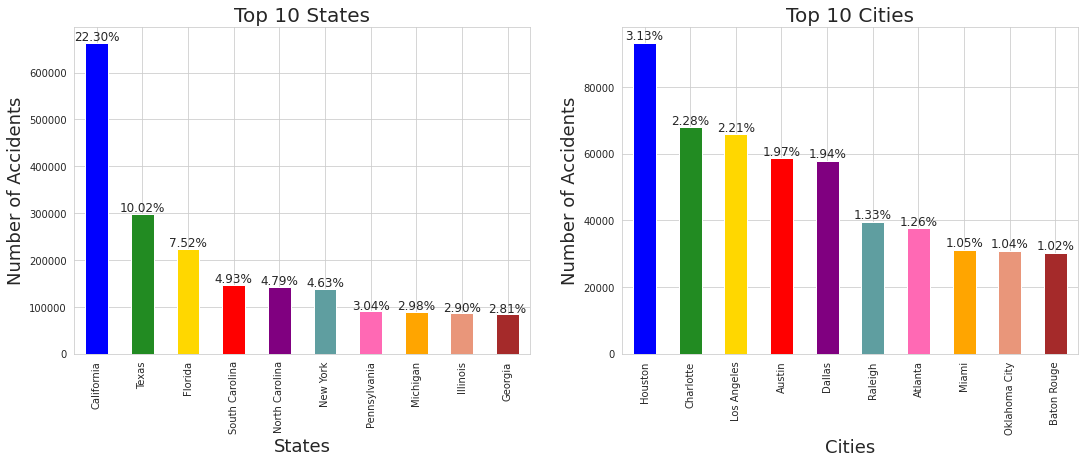

In [17]:
# Visualization of the 10 states and cities where accidents happen the most using pandas bult-in visualization

df_state = df_top10_states.set_index('State')
df_city = df_top10_cities.set_index('City')

fig,ax = plt.subplots(1,2,figsize=(18,6))
color = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')

df_state['Number Of Accidents'].plot.bar(ax=ax[0],color=color)
ax[0].set_title("Top 10 States",size=20)
ax[0].set_xlabel('States',size=18)
ax[0].set_ylabel('Number of Accidents',size=18)

# Add percentages
total = len(df_accidents)
for p in ax[0].patches:
    height = p.get_height()
    # ax[0].text(x,y,string,ha,fontsize). x,y is the coordinates of the percentage text on the ax[0].
    ax[0].text(p.get_x()+p.get_width()/2,
            height + 5000,
            '{:1.2f}%'.format(height/total*100),
            ha="center",
            fontsize=12) 

df_city['Number Of Accidents'].plot(kind='bar',ax=ax[1],color=color)
ax[1].set_title("Top 10 Cities",size=20)
ax[1].set_xlabel('Cities',size=18)
ax[1].set_ylabel('Number of Accidents',size=18)

# Add percentages
total = len(df_accidents)
for p in ax[1].patches:
    height = p.get_height()
    # ax[1].text(x,y,string,ha,fontsize). x,y is the coordinates of the percentage text on the ax[1].
    ax[1].text(p.get_x()+p.get_width()/2,
            height + 1000,
            '{:1.2f}%'.format(height/total*100),
            ha="center",
            fontsize=12) 

In [18]:
print('Comment: Although Texas is not the top 1 state in term of accidents, it has 3 cities (Houston, Austin and Dallas) in the top 5 cities.')

Comment: Although Texas is not the top 1 state in term of accidents, it has 3 cities (Houston, Austin and Dallas) in the top 5 cities.


## Interactive Visualization of Accidents Distribution over the entire United States

In [0]:
# Defining data variable
text = df_accidents_per_state.apply(lambda x: x['State'] + ': ' + str(x['Percentage']) + ' %',axis=1)
data = dict(type = 'choropleth',
           locations = df_accidents_per_state['Abbr'],
           locationmode = 'USA-states',
            reversescale = True,
           text = text,
           z = df_accidents_per_state['Number Of Accidents'], # the color vary according to z value.
           colorbar = {'title':'Number of Accidents'}
           )

# Defining layout variable
layout = dict(geo = dict(scope='usa', showlakes=False, lakecolor='rgb(85,173,240)'),
             title = 'Accidents from February 2016 to December 2019 Distribution in the United States.'
             )

In [20]:
# Displaying the interactive choropleth
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

## How accidents are distributed in term of severity and their occurrence moment (Day or Night)

Text(0, 0.5, 'Number of Accidents')

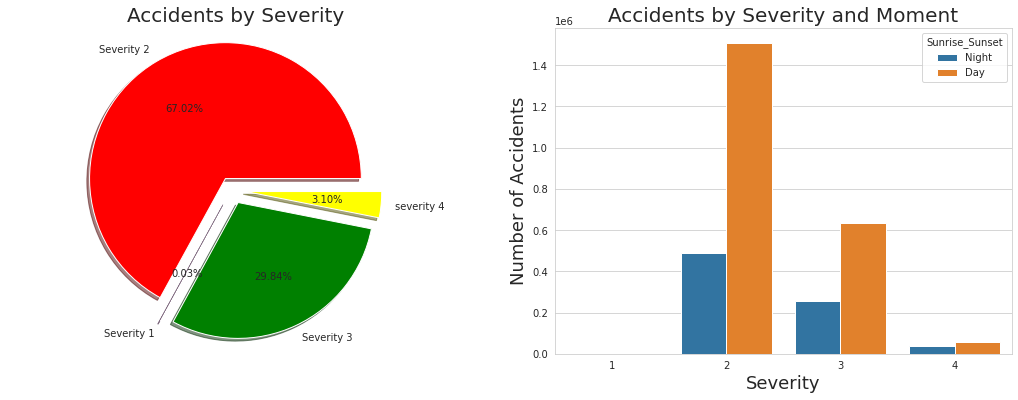

In [21]:
# Distribution of accidents according to their severity and when (Day/Night) they occur.
fig,ax = plt.subplots(1,2,figsize=(18,6))

# Pie chart, that shows the distribution of accidents by severity from 1 to 4.
sizes = df_accidents.groupby('Severity').size() # serie with severity as index and the number of row of each categorie as values.
sizes = sizes[[2,1,3,4]] # the serie is reordered so that the values are clearly visible in the pie.
labels = 'Severity 2','Severity 1', 'Severity 3', 'severity 4' 
explode = (0.1,0.1,0.1,0.1)
colors = ['red','purple','green','yellow']
ax[0].pie(sizes, explode=explode, labels= labels,colors=colors,autopct='%1.2f%%',shadow=True, startangle=0)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Accidents by Severity', size=20)

# Seaborn countplot of accident distributions.
sns.countplot(data=df_accidents,x='Severity', hue='Sunrise_Sunset',ax=ax[1])
ax[1].set_title('Accidents by Severity and Moment', size= 20)
ax[1].set_xlabel('Severity', size=18)
ax[1].set_ylabel('Number of Accidents', size=18)

In [22]:
print('Comment:The large majority of accidents has from the category 2 on a scale of 4 in term of severity \
\nand no matter its severity, an accident likely occurs during the day than at night.')

Comment:The large majority of accidents has from the category 2 on a scale of 4 in term of severity 
and no matter its severity, an accident likely occurs during the day than at night.


# Part 2: Accidents in Cleveland Ohio

## How Cleveland Accidents are distributed per year, month, day and hour

In [23]:
# Let's do some type conversions and filters to get only  accidents that occurred in Cleveland Ohio.
from datetime import datetime

years = ['2016','2017','2018','2019']
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time'])
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time'])

df_accidents_cleveland = df_accidents[(df_accidents['State']=='OH') & (df_accidents['City']=='Cleveland')]
df_accidents_cleveland.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
87,A-88,MapQuest,201.0,3,2016-02-11 05:32:29,2016-02-11 06:02:29,41.422199,-81.843018,NaN,NaN,0.01,Accident on I-480 Westbound at Exit 9 OH-17 Br...,NaN,Grayton Rd,R,Cleveland,Cuyahoga,OH,44135,US,US/Eastern,KCLE,2016-02-11 05:51:00,14.0,0.5,56.0,30.14,9.0,NW,11.5,0.0,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
91,A-92,MapQuest,201.0,3,2016-02-11 06:29:00,2016-02-11 21:00:00,41.420818,-81.694008,NaN,NaN,0.01,Accident on I-480 Eastbound at Exit 16 OH-94 S...,NaN,I-480 E,R,Cleveland,Cuyahoga,OH,44109,US,US/Eastern,KBKL,2016-02-11 06:53:00,17.1,-0.3,59.0,30.12,10.0,NW,21.9,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
96,A-97,MapQuest,201.0,3,2016-02-11 07:29:06,2016-02-11 08:18:10,41.355396,-81.819267,NaN,NaN,0.01,Accident on I-71 Northbound at Exit 234 US-42 ...,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-11 07:51:00,15.1,-1.6,51.0,30.18,10.0,NW,18.4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
150,A-151,MapQuest,201.0,2,2016-02-15 07:37:49,2016-02-15 08:07:49,41.410461,-81.725853,NaN,NaN,0.00,Accident on Westlake Ave at Torrington Ave.,5847.0,Westlake Ave,L,Cleveland,Cuyahoga,OH,44129-2344,US,US/Eastern,KCLE,2016-02-15 07:51:00,21.0,9.3,85.0,30.10,4.0,SSE,11.5,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
235,A-236,MapQuest,201.0,2,2016-02-18 06:27:59,2016-02-18 06:57:59,41.414131,-81.632141,NaN,NaN,0.01,Accident on OH-17 Granger Rd at Canal Rd. Expe...,7998.0,Granger Rd,R,Cleveland,Cuyahoga,OH,44125-4827,US,US/Eastern,KBKL,2016-02-18 06:53:00,19.0,11.1,71.0,30.52,10.0,SE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [24]:
print('Comment: There are {:,} accidents that occurred in Cleveland Ohio between February 2016 and December 2019'.format(len(df_accidents_cleveland)))

Comment: There are 4,768 accidents that occurred in Cleveland Ohio between February 2016 and December 2019


In [0]:
# Let's add some new columns that will help us in hours, week days, months, and years analysis.

  # function to create dates on format 'Fri Mar 20th, 2020'
def myDate(d):
  if d.day in [1,21,31]:
    return d.strftime('%a %b %dst, %Y')
  elif d.day in [2,22]:
    return d.strftime('%a %b %dnd, %Y')
  elif d.day==3:
    return d.strftime('%a %b %drd, %Y')
  else:
    return d.strftime('%a %b %dth, %Y')

df_accidents_cleveland['Hour'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.hour)
df_accidents_cleveland['Weekday'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.dayofweek)
df_accidents_cleveland['Monthday'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.day)
df_accidents_cleveland['Month'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.month)
df_accidents_cleveland['Year'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.year)
df_accidents_cleveland['Date'] = df_accidents_cleveland['Start_Time'].apply(myDate)


In [26]:
df_accidents_cleveland.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Monthday,Month,Year,Date
87,A-88,MapQuest,201.0,3,2016-02-11 05:32:29,2016-02-11 06:02:29,41.422199,-81.843018,NaN,NaN,0.01,Accident on I-480 Westbound at Exit 9 OH-17 Br...,NaN,Grayton Rd,R,Cleveland,Cuyahoga,OH,44135,US,US/Eastern,KCLE,2016-02-11 05:51:00,14.0,0.5,56.0,30.14,9.0,NW,11.5,0.0,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,5,3,11,2,2016,"Thu Feb 11th, 2016"
91,A-92,MapQuest,201.0,3,2016-02-11 06:29:00,2016-02-11 21:00:00,41.420818,-81.694008,NaN,NaN,0.01,Accident on I-480 Eastbound at Exit 16 OH-94 S...,NaN,I-480 E,R,Cleveland,Cuyahoga,OH,44109,US,US/Eastern,KBKL,2016-02-11 06:53:00,17.1,-0.3,59.0,30.12,10.0,NW,21.9,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,6,3,11,2,2016,"Thu Feb 11th, 2016"
96,A-97,MapQuest,201.0,3,2016-02-11 07:29:06,2016-02-11 08:18:10,41.355396,-81.819267,NaN,NaN,0.01,Accident on I-71 Northbound at Exit 234 US-42 ...,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-11 07:51:00,15.1,-1.6,51.0,30.18,10.0,NW,18.4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,7,3,11,2,2016,"Thu Feb 11th, 2016"
150,A-151,MapQuest,201.0,2,2016-02-15 07:37:49,2016-02-15 08:07:49,41.410461,-81.725853,NaN,NaN,0.00,Accident on Westlake Ave at Torrington Ave.,5847.0,Westlake Ave,L,Cleveland,Cuyahoga,OH,44129-2344,US,US/Eastern,KCLE,2016-02-15 07:51:00,21.0,9.3,85.0,30.10,4.0,SSE,11.5,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,7,0,15,2,2016,"Mon Feb 15th, 2016"
235,A-236,MapQuest,201.0,2,2016-02-18 06:27:59,2016-02-18 06:57:59,41.414131,-81.632141,NaN,NaN,0.01,Accident on OH-17 Granger Rd at Canal Rd. Expe...,7998.0,Granger Rd,R,Cleveland,Cuyahoga,OH,44125-4827,US,US/Eastern,KBKL,2016-02-18 06:53:00,19.0,11.1,71.0,30.52,10.0,SE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,6,3,18,2,2016,"Thu Feb 18th, 2016"


### Accidents per Year

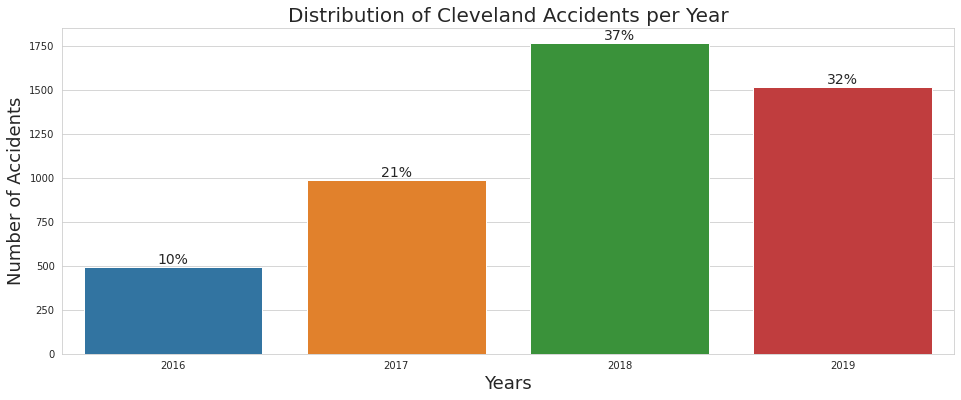

In [27]:
fig = plt.figure(figsize=(16,6))

ax = sns.countplot(data=df_accidents_cleveland,x='Year')
ax.set_title('Distribution of Cleveland Accidents per Year', size= 20)
ax.set_xlabel('Years', size=18)
ax.set_ylabel('Number of Accidents', size=18)

# Adding percentage for each year
total = len(df_accidents_cleveland)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 20,
            '{:1.0f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 

In [29]:
print('Comment:The number of accidents has doubled from 2016 to 2017, then almost doubled from 2017 to 2018 before decreasing from 2018 to 2019.')

Comment:The number of accidents has doubled from 2016 to 2017, then almost doubled from 2017 to 2018 before decreasing from 2018 to 2019.


### Accidents per Month

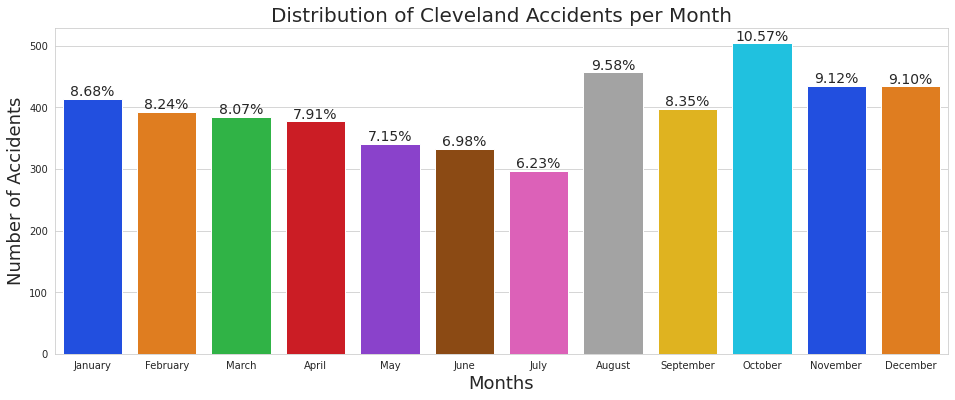

In [31]:
fig = plt.figure(figsize=(16,6))

ax = sns.countplot(data=df_accidents_cleveland,x='Month',palette='bright')
ax.set_title('Distribution of Cleveland Accidents per Month', size= 20)
ax.set_xlabel('Months', size=18)
ax.set_xticklabels(months)
ax.set_ylabel('Number of Accidents', size=18)

# Adding percentage for each month
total = len(df_accidents_cleveland)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 5,
            '{:1.2f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 


In [32]:
print('Comment: Most accidents happen in October, followed by August. July is the month with less accidents.')

Comment: Most accidents happen in October, followed by August. July is the month with less accidents.


In [33]:
# Matrix
matrix_month = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Month',aggfunc='count')
  # Replace the column with month number by the whole month name.
matrix_month.columns = months

matrix_month

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,58.0,52.0,54.0,36.0,40.0,32.0,52.0,41.0,30.0,37.0,63.0
2017,71.0,71.0,67.0,40.0,57.0,37.0,35.0,152.0,136.0,122.0,77.0,125.0
2018,151.0,136.0,156.0,148.0,132.0,147.0,128.0,142.0,117.0,214.0,170.0,124.0
2019,192.0,128.0,110.0,135.0,116.0,109.0,102.0,111.0,104.0,138.0,151.0,122.0


Text(767.7272727272725, 0.5, 'Year')

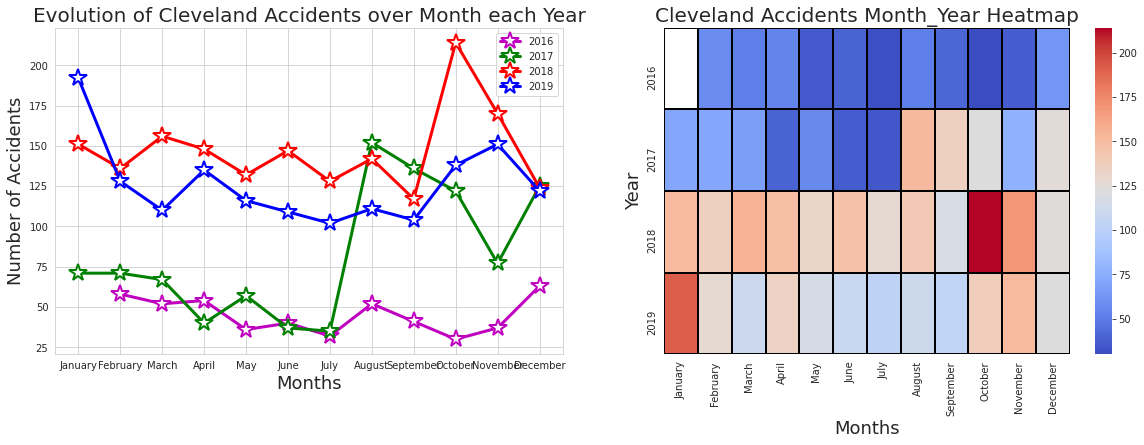

In [45]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

# Evolution of Accidents over Months each year.
  # when a serie is plotted, the values are the y and indexes are the x
ax[0].plot(matrix_month.loc[2016],color='m',label='2016',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='m',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2017],color='g',label='2017',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='g',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2018],color='r',label='2018',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='r',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2019],color='b',label='2019',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax[0].legend(loc=0)
ax[0].set_title('Evolution of Cleveland Accidents over Month each Year', size= 20)
ax[0].set_xlabel('Months', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

# Heatmap
sns.heatmap(matrix_month,cmap='coolwarm',linewidth=1,linecolor='black',ax=ax[1],xticklabels=months)
ax[1].set_title('Cleveland Accidents Month_Year Heatmap', size= 20)
ax[1].set_xlabel('Months', size=18)
ax[1].set_ylabel('Year', size=18)

In [46]:
print('Comment: October 2018 ({} accidents) and January 2019 ({} accidents) registered the most accidents\
\nwhile October 2016 ({} accidents) and July 2016 ({} accidents) registered the less'.format(int(matrix_month.loc[2018,'October']),
                                                                                              int(matrix_month.loc[2019,'January']),
                                                                                              int(matrix_month.loc[2016,'October']),
                                                                                              int(matrix_month.loc[2016,'July']))) 

Comment: October 2018 (214 accidents) and January 2019 (192 accidents) registered the most accidents
while October 2016 (30 accidents) and July 2016 (32 accidents) registered the less


In [47]:
# Evolution over months for the 4 years

  # a df is created for each year with the number of accidents per month and then those df are concatenated on years
df_evolution = pd.concat([matrix_month.loc[[2016]].rename(index={2016:'Number of Accidents'}),
                         matrix_month.loc[[2017]].rename(index={2017:'Number of Accidents'}),
                        matrix_month.loc[[2018]].rename(index={2018:'Number of Accidents'}),
                        matrix_month.loc[[2019]].rename(index={2019:'Number of Accidents'})],
                         keys=years,axis=1)
df_evolution.index.name = 'Accidents'

df_evolution

2016                 ...    2019                  
                    January February March  ... October November December
Accidents                                   ...                          
Number of Accidents     NaN     58.0  52.0  ...   138.0    151.0    122.0

[1 rows x 48 columns]

In [0]:
# Returns a list in the format J16, F16, ..., N19,D19 for January 2016, February 2016,...,November 2019, December 2019.
temp = []
for y in years:
  for m in months:
    temp.append(m[0]+y[2:])
    x_values= np.array(temp)

y_values = df_evolution.loc['Number of Accidents'].values # only the values of the serie that has a multi-level index.

Text(0, 0.5, 'Number of Accidents')

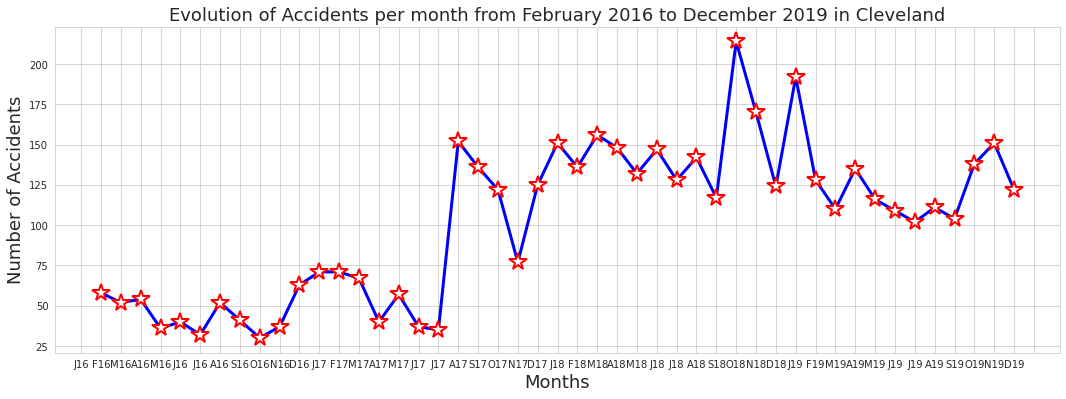

In [49]:
plt.figure(figsize=(18,6))

plt.plot(y_values,color='b',linewidth=3,linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='r',markeredgewidth='2')
  # The 48 month names replace the value 0 - 48 which are the original ticks.
plt.xticks(ticks=np.arange(0,49),labels=x_values); # the semi colon (;) at the end allows to hide the description output.
plt.title('Evolution of Accidents per month from February 2016 to December 2019 in Cleveland',size=18)
plt.xlabel('Months', size=18)
plt.ylabel('Number of Accidents', size=18)

In [50]:
print('Comment: Since August 2017 when the number of accidents passed the threshold of 100 accidents per month, \
\nit has always been over 100 except for the month of November 2017')

Comment: Since August 2017 when the number of accidents passed the threshold of 100 accidents per month, 
it has always been over 100 except for the month of November 2017


### Accidents per Day

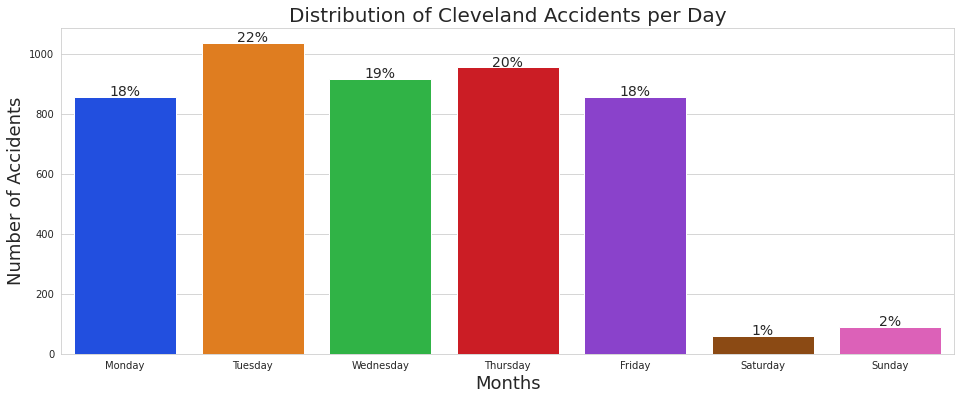

In [51]:
fig = plt.figure(figsize=(16,6))

ax = sns.countplot(data=df_accidents_cleveland,x='Weekday',palette='bright')
ax.set_title('Distribution of Cleveland Accidents per Day', size= 20)
ax.set_xlabel('Months', size=18)
ax.set_xticklabels(days)
ax.set_ylabel('Number of Accidents', size=18)

# Adding percentage for each day
total = len(df_accidents_cleveland)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 5,
            '{:1.0f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 


In [52]:
print('Comment: Accidents occur less in weekend (Saturdays and sundays). They likely happen on Tuesdays.')

Comment: Accidents occur less in weekend (Saturdays and sundays). They likely happen on Tuesdays.


In [53]:
# Heatmap of accidents per day
matrix_day = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Weekday',aggfunc='count')
matrix_day.columns = days

matrix_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2016,89,97,85,131,79,7,7
2017,162,216,174,216,187,16,19
2018,318,385,356,299,335,25,47
2019,287,337,302,308,256,11,17


Text(767.7272727272725, 0.5, 'Years')

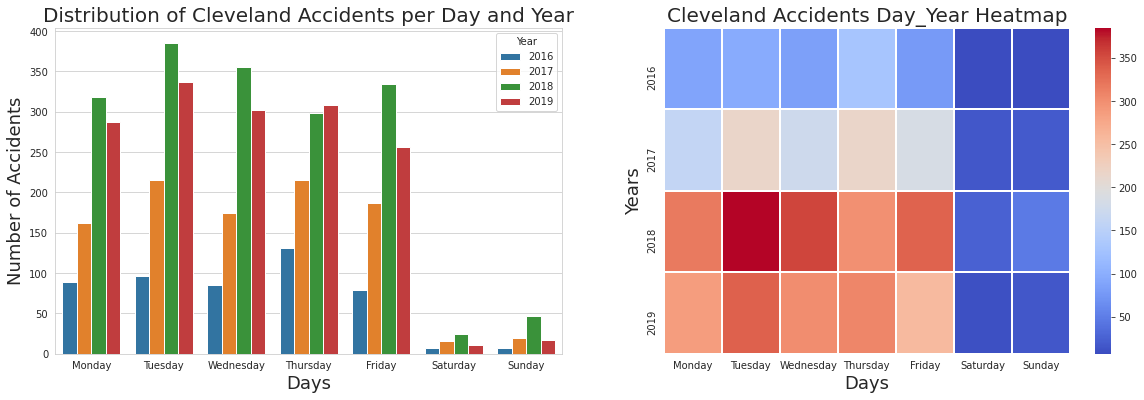

In [56]:
# Distribution of accidents over years and days using Seaborn visualization.
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.countplot(data=df_accidents_cleveland,x='Weekday',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Day and Year', size= 20)
ax[0].set_xlabel('Days', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)
ax[0].set_xticklabels(labels=days)

sns.heatmap(matrix_day,cmap='coolwarm',linewidth=1,linecolor='white',ax=ax[1])
ax[1].set_title('Cleveland Accidents Day_Year Heatmap', size= 20)
ax[1].set_xlabel('Days', size=18)
ax[1].set_ylabel('Years', size=18)

In [57]:
print('Comment: Except for the year 2016 when it was Thursday, Tuesday is the day when accidents likely happen.')

Comment: Except for the year 2016 when it was Thursday, Tuesday is the day when accidents likely happen.


In [58]:
# A serie giving the number of accidents that happen each day.
accidents_per_day = df_accidents_cleveland['Date'].value_counts()
accidents_per_day.head(5)

Thu Apr 05th, 2018    22
Fri Jan 12th, 2018    22
Wed Mar 06th, 2019    20
Fri Oct 12th, 2018    20
Thu Jan 24th, 2019    18
Name: Date, dtype: int64

In [59]:
# Create the DataFrame accidents per day.
df_accidents_per_day = pd.DataFrame({'Date': accidents_per_day.index,'Number of Accidents': accidents_per_day.values})

# Add the column Percentage to the DataFrame.
df_accidents_per_day['Percentage'] = df_accidents_per_day['Number of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(accidents_per_day)*100))
                                        
# Display the top 10 Days that registered the most accidents.
rank = np.arange(1,11)
df_top10_days = df_accidents_per_day.head(10).set_index(rank)
df_top10_days

,Date,Number of Accidents,Percentage
1,"Thu Apr 05th, 2018",22,02.17
2,"Fri Jan 12th, 2018",22,02.17
3,"Wed Mar 06th, 2019",20,01.97
4,"Fri Oct 12th, 2018",20,01.97
5,"Thu Jan 24th, 2019",18,01.77
6,"Mon Jul 09th, 2018",18,01.77
7,"Wed Oct 17th, 2018",18,01.77
8,"Wed Mar 21st, 2018",18,01.77
9,"Mon Dec 18th, 2017",18,01.77
10,"Fri Sep 08th, 2017",18,01.77


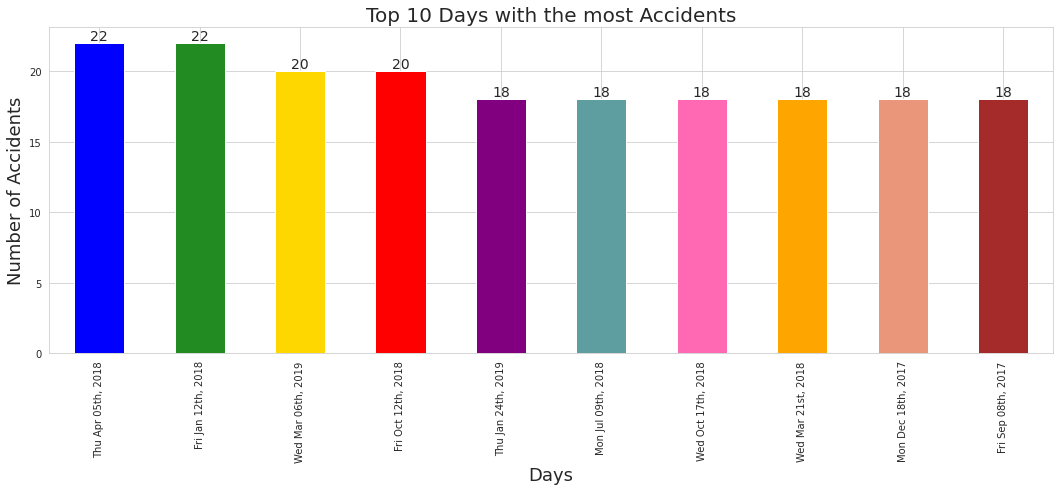

In [61]:
# Visualization of the 10 days when accidents happen the most using pandas bult-in visualization
fig = plt.figure(figsize=(18,6))
df_days = df_top10_days.set_index('Date')

color = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')

ax = df_days['Number of Accidents'].plot.bar(color=color)
plt.title("Top 10 Days with the most Accidents",size=20)
plt.xlabel('Days',size=18)
plt.ylabel('Number of Accidents',size=18)

# Adding the number of accident for each day
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 0.2,
            '{}'.format(height),
            ha="center",
            fontsize=14) 


In [63]:
total_days = len(accidents_per_day)
total_accidents = accidents_per_day.values.sum()
daily_average = total_accidents/total_days

print('While the daily average for accidents is about {}, each day of the top ten days registers about 5 times the average.'.format(int(daily_average)))

While the daily average for accidents is about 4, each day of the top ten days registers about 5 times the average.


### Accidents per Hour

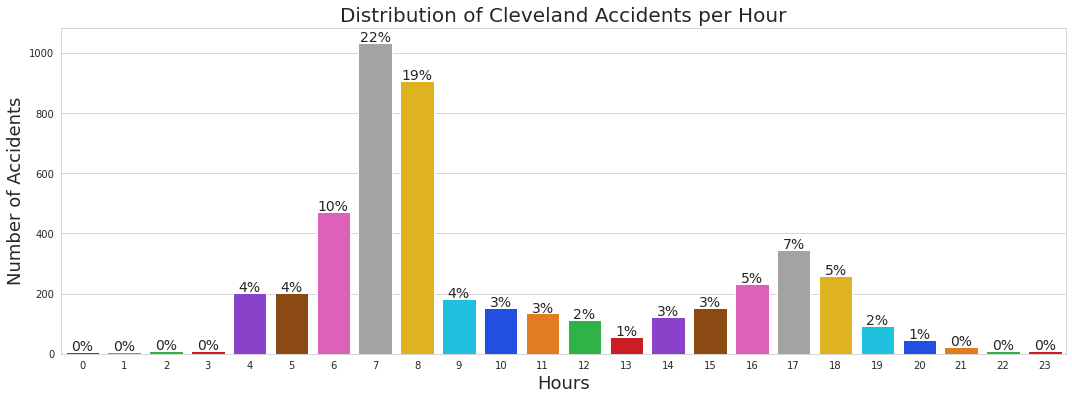

In [64]:
fig = plt.figure(figsize=(18,6))

ax = sns.countplot(data=df_accidents_cleveland,x='Hour',palette='bright')
ax.set_title('Distribution of Cleveland Accidents per Hour', size= 20)
ax.set_xlabel('Hours', size=18)
ax.set_ylabel('Number of Accidents', size=18)

# adding percentage for each hour
total = len(df_accidents_cleveland)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 5,
            '{:1.0f}%'.format(height/total*100),
            ha="center",
            fontsize=14) 

In [100]:
print('Comment: The large majority of accidents happens around 7 and 8 am.')

Comment: The large majority of accidents happens around 7 and 8 am.


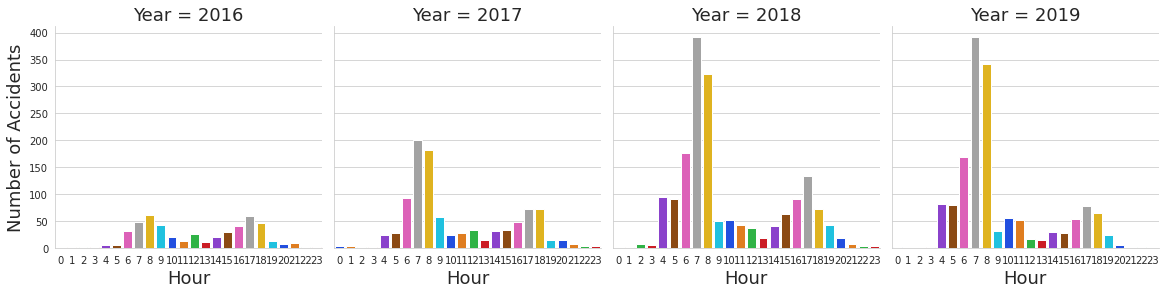

In [69]:
# Using seaborn catplot to display two charts side by side like the facetgrid
g= sns.catplot(data=df_accidents_cleveland,x='Hour',col='Year',kind='count',height=4, aspect=1,palette='bright')
g.set_titles(size=18)
g.set_xlabels(size=18)
g.set_ylabels('Number of Accidents',size=18)

In [70]:
print('Except 2016, the 3 other years show the same trends: Accidents mostly happen in the morning and \
occur around 7 and 8 am.\nSince we already saw that accidents mostly occur on week days,\
we can conclude that accident happen during morning rush hours\n when people are on their way to work.')

Except 2016, the 3 other years show the same trends: Accidents mostly happen in the morning and occur around 7 and 8 am.
Since we already saw that accidents mostly occur on week days,we can conclude that accident happen during morning rush hours
 when people are on their way to work.


In [71]:
# Heatmap of accidents per Hour
matrix_hour = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Hour',aggfunc='count')

matrix_hour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,,,,
2016,NaN,2.0,1.0,2.0,5.0,6.0,32.0,48.0,61.0,43.0,20.0,13.0,25.0,11.0,20.0,30.0,40.0,59.0,46.0,13.0,7.0,8.0,1.0,2.0
2017,3.0,3.0,1.0,1.0,23.0,27.0,92.0,201.0,181.0,58.0,24.0,27.0,34.0,14.0,31.0,33.0,48.0,73.0,73.0,15.0,14.0,7.0,4.0,3.0
2018,NaN,1.0,7.0,6.0,94.0,90.0,177.0,392.0,324.0,49.0,52.0,43.0,36.0,18.0,41.0,62.0,91.0,134.0,73.0,43.0,19.0,7.0,3.0,3.0
2019,2.0,NaN,NaN,1.0,81.0,80.0,169.0,391.0,341.0,32.0,56.0,51.0,17.0,14.0,29.0,28.0,53.0,78.0,65.0,23.0,6.0,NaN,1.0,NaN


Text(767.7272727272725, 0.5, 'Years')

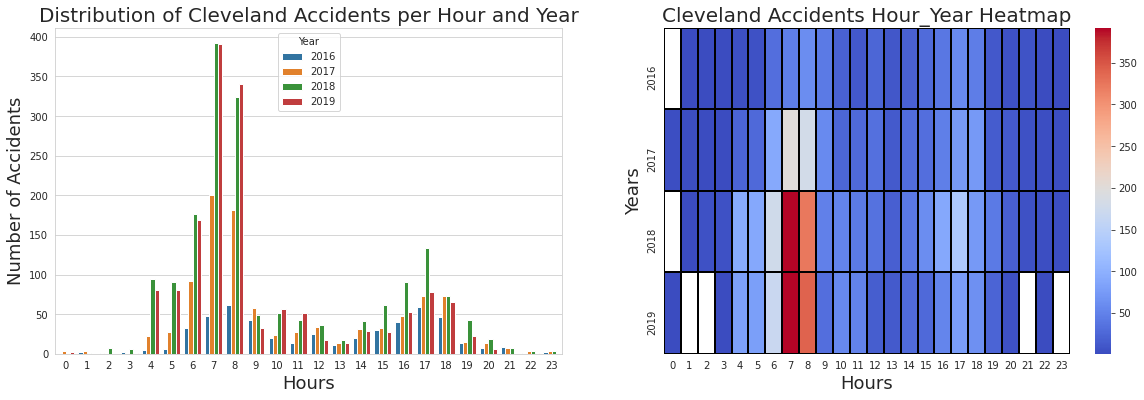

In [74]:
# Distribution of accidents per Hour using Seaborn visualization.
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.countplot(data=df_accidents_cleveland,x='Hour',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Hour and Year', size= 20)
ax[0].set_xlabel('Hours', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

sns.heatmap(matrix_hour,cmap='coolwarm',linewidth=1,linecolor='black',ax=ax[1])
ax[1].set_title('Cleveland Accidents Hour_Year Heatmap', size= 20)
ax[1].set_xlabel('Hours', size=18)
ax[1].set_ylabel('Years', size=18)

In [75]:
print('Comment: The heatmap shows clearly that the accidents happen mostly around 7 and 8 am for 2017, 2018 and 2019.')

Comment: The heatmap shows clearly that the accidents happen mostly around 7 and 8 am for 2017, 2018 and 2019.


### How accident features are correlated

Text(0.5, 1.0, 'Cleveland Accidents features Heatmap')

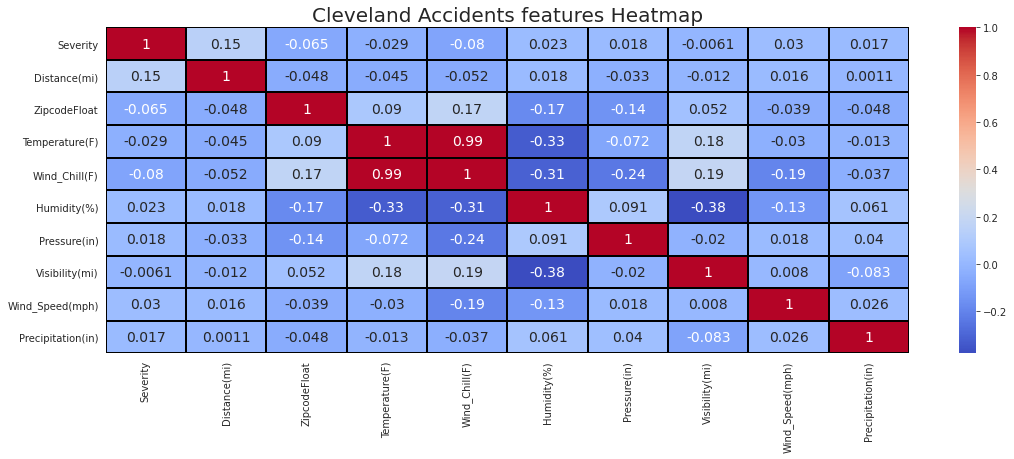

In [76]:
# Let's convert the zip code feature into float by adding a new column
df_accidents['ZipcodeFloat'] = df_accidents['Zipcode'].apply(lambda z: z if pd.isna(z) else float(z[:5]))

matrix_corr = df_accidents[['Severity','Distance(mi)','ZipcodeFloat','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)',
                            'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr()

plt.figure(figsize=(18,6))
sns.heatmap(matrix_corr,cmap='coolwarm',linewidth=1,linecolor='black',annot=True,annot_kws={'size':14})
plt.title('Cleveland Accidents features Heatmap', size= 20)

In [77]:
print('Comment: From this heatmap, it can be said that there is some realationship between the severity of the accidednt and\
\nthe distance in mile representing the length of the road extent affected by the accident ')

Comment: From this heatmap, it can be said that there is some realationship between the severity of the accidednt and
the distance in mile representing the length of the road extent affected by the accident 


## Spatial Analysis of Cleveland Accidents

In this spatial Analysis section, we will plot Cleveland accidents, EMS, and Hospitals locations to analyze the spatial relationships that exist between those entities.

### Getting GeoDataFrames from DataFrames and Shapefiles

#### Cleveland Boundary GeoDataFrame (Shapefile [source](https://opendata.arcgis.com/datasets/4441f1fc778a48748489a6534482c96e_0.zip))

In [80]:
# Use attribute queries to select only Cleveland boundary from the shapefile of all the Cuyahoga county municipalities (GCS = WGS84 that is epsg=4326)
gdf_municipalities = gpd.read_file('/content/drive/My Drive/Data Science Projects/Accident_Analysis/Municipalities_WGS84__Tiled/Municipalities_WGS84__Tiled.shp')
gdf_cleveland = gdf_municipalities[gdf_municipalities['MUNI_NAME']=='Cleveland'].reset_index(drop=True)

gdf_cleveland = gdf_cleveland[['OBJECTID', 'MUNI_NAME', 'CENSUS_ID', 'geometry']]
gdf_cleveland

,OBJECTID,MUNI_NAME,CENSUS_ID,geometry
0,46,Cleveland,16000.0,"POLYGON ((-81.54994 41.59518, -81.54989 41.588..."


#### Cleveland Accidents GeodataFrame

In [81]:
df_spatatial = df_accidents_cleveland[['ID','Date', 'Severity', 'Start_Lat', 'Start_Lng', 'Street', 'City', 'County',
       'State', 'Zipcode']] 

# Create the GeoDataFrame and set its Geographic Coordinate System to WGS 84 (EPSG:4326)
gdf_accidents_cleveland = gpd.GeoDataFrame(df_spatatial,
                                           geometry=gpd.points_from_xy(df_spatatial['Start_Lng'],df_spatatial['Start_Lat']),
                                           crs='epsg:4326')

# Get all accidents that actually fall into Cleveland boundary using spatial join
gdf_accidents_cleveland_spatial = gpd.sjoin(gdf_accidents_cleveland,gdf_cleveland,op='within',lsuffix='ACC',rsuffix='CLE').reset_index(drop=True)
gdf_accidents_cleveland_spatial.head(3)

,ID,Date,Severity,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,geometry,index_CLE,OBJECTID,MUNI_NAME,CENSUS_ID
0,A-88,"Thu Feb 11th, 2016",3,41.422199,-81.843018,Grayton Rd,Cleveland,Cuyahoga,OH,44135,POINT (-81.84302 41.42220),0,46,Cleveland,16000.0
1,A-92,"Thu Feb 11th, 2016",3,41.420818,-81.694008,I-480 E,Cleveland,Cuyahoga,OH,44109,POINT (-81.69401 41.42082),0,46,Cleveland,16000.0
2,A-241,"Thu Feb 18th, 2016",3,41.422199,-81.843018,Grayton Rd,Cleveland,Cuyahoga,OH,44135,POINT (-81.84302 41.42220),0,46,Cleveland,16000.0


In [82]:
print('Comment: While the attribute query performed on all United States accidents gives {:,} accidents for Cleveland, the spatial join tells us that\
\n there are actually {:,} accidents that fall within cleveland municipality boundary.'.format(len(df_accidents_cleveland),len(gdf_accidents_cleveland_spatial)))

Comment: While the attribute query performed on all United States accidents gives 4,768 accidents for Cleveland, the spatial join tells us that
 there are actually 3,773 accidents that fall within cleveland municipality boundary.


#### Cleveland Emergency Medical Service (EMS) Points GeoDataFrame (Shapefile [source](https://opendata.arcgis.com/datasets/362c9480f12e4587b6a502f9ceedccde_0.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D))

In [83]:
# Use spatial join to select only cleveland EMS from the shapefile of all United States EMS (GCS = WGS84 that is epsg=4326)
gdf_ems = gpd.read_file('/content/drive/My Drive/Data Science Projects/Accident_Analysis/Emergency_Medical_Service_EMS_Stations/Emergency_Medical_Service_EMS_Stations.shp')
gdf_ems = gdf_ems[['OBJECTID','ADDRESS','CITY','STATE','ZIP','COUNTY','NAICSDESCR','TELEPHONE','DIRECTIONS','NAME','geometry']]

# Spatial join: it will return all EMS that fall within Cleveland boundary
gdf_ems_cleveland = gpd.sjoin(gdf_ems,gdf_cleveland,op='within',lsuffix='EMS',rsuffix='CLE').reset_index(drop=True)
gdf_ems_cleveland.head(3)

,OBJECTID_EMS,ADDRESS,CITY,STATE,ZIP,COUNTY,NAICSDESCR,TELEPHONE,DIRECTIONS,NAME,geometry,index_CLE,OBJECTID_CLE,MUNI_NAME,CENSUS_ID
0,24854,1279 WEST 73RD STREET,CLEVELAND,OH,44102,CUYAHOGA,"AMBULANCE SERVICES, AIR OR GROUND",(216) 221-6000,LOCATED APPROXIMATELY 0.1 MILES NORTH OF INTER...,MOBIL MARTIN EMERGENCY MEDICAL SERVICES,POINT (-81.73430 41.48614),0,46,Cleveland,16000.0
1,24929,5651 POSTAL ROAD,CLEVELAND,OH,44135,CUYAHOGA,FIRE AND RESCUE SERVICE,(216) 265-4898,"LOCATED EAST SIDE OF POSTAL ROAD, APPROXIMATEL...",CLEVELAND HOPKINS INTERNATIONAL AIRPORT FIRE R...,POINT (-81.84527 41.40514),0,46,Cleveland,16000.0
2,26155,1501 NORTH MARGINAL ROAD,CLEVELAND,OH,44114,CUYAHOGA,FIRE AND RESCUE SERVICE,(216) 265-4898,"LOCATED ON THE NW SIDE OF NORTH MARGINAL ROAD,...",CLEVELAND BURKE LAKEFRONT AIRCRAFT RESCUE FIRE...,POINT (-81.69063 41.51000),0,46,Cleveland,16000.0


In [86]:
print('Comment: There are {} EMS locations in Cleveland'.format(len(gdf_ems_cleveland)))

Comment: There are 6 EMS locations in Cleveland


#### Cleveland Hospitals Points GeoDataFrame (Shapefile [source](https://opendata.arcgis.com/datasets/6ac5e325468c4cb9b905f1728d6fbf0f_0.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D))

In [87]:
# Use spatial join to select only cleveland Hospitals from the shapefile of all United States EMS (GCS = WGS84 that is epsg=4326)
gdf_hospitals = gpd.read_file('/content/drive/My Drive/Data Science Projects/Accident_Analysis/Hospitals/Hospitals.shp')
gdf_hospitals = gdf_hospitals[['OBJECTID','NAME','ADDRESS','CITY','STATE','ZIP','TYPE','TRAUMA','STATUS','NAICS_DESC','geometry']]
gdf_hospitals = gdf_hospitals[gdf_hospitals['STATUS']=='OPEN']

# Spatial join: it will return all EMS that fall within Cleveland boundary
gdf_hospitals_cleveland = gpd.sjoin(gdf_hospitals,gdf_cleveland,op='within',lsuffix='HOS',rsuffix='CLE').reset_index(drop=True)
gdf_hospitals_cleveland.head(3)

,OBJECTID_HOS,NAME,ADDRESS,CITY,STATE,ZIP,TYPE,TRAUMA,STATUS,NAICS_DESC,geometry,index_CLE,OBJECTID_CLE,MUNI_NAME,CENSUS_ID
0,1309,GRACE HOSPITAL AT FAIRVIEW,18101 LORAIN AVENUE,CLEVELAND,OH,44111,LONG TERM CARE,NOT AVAILABLE,OPEN,"EXTENDED CARE HOSPITALS (EXCEPT MENTAL, SUBSTA...",POINT (-81.82414 41.45024),0,46,Cleveland,16000.0
1,1318,UNIVERSITY HOSPITALS OF CLEVELAND,11100 EUCLID AVENUE,CLEVELAND,OH,44106,GENERAL ACUTE CARE,LEVEL I,OPEN,GENERAL MEDICAL AND SURGICAL HOSPITALS,POINT (-81.60510 41.50614),0,46,Cleveland,16000.0
2,1319,CLEVELAND CLINIC,9500 EUCLID AVENUE,CLEVELAND,OH,44195,GENERAL ACUTE CARE,NOT AVAILABLE,OPEN,GENERAL MEDICAL AND SURGICAL HOSPITALS,POINT (-81.62079 41.50275),0,46,Cleveland,16000.0


In [88]:
print('Comment: There are {} Hospitals locations in Cleveland'.format(len(gdf_hospitals_cleveland)))

Comment: There are 12 Hospitals locations in Cleveland


#### Plotting GeoDataFrames

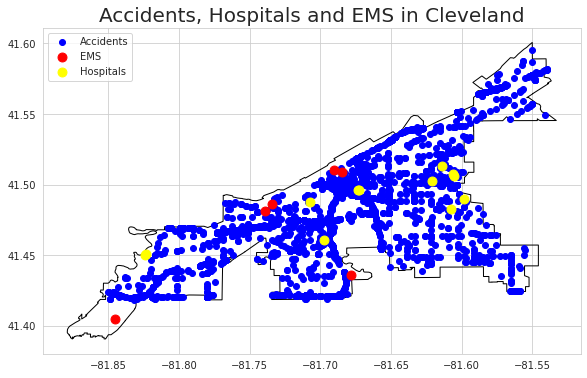

In [89]:
ax = gdf_cleveland.plot(figsize=(20,6), color='none',edgecolor='black')
gdf_accidents_cleveland_spatial.plot(color='blue',label='Accidents',ax=ax)
gdf_ems_cleveland.plot(color='red',markersize=80,label='EMS',ax=ax)
gdf_hospitals_cleveland.plot(color='Yellow',markersize=80,label='Hospitals',ax=ax)
ax.set_title('Accidents, Hospitals and EMS in Cleveland',size=20)
ax.legend()


In [101]:
print("Comment: The South-West part of Cleveland that is the Cleveland Hopkins Airport area doesn't register any accident.")

Comment: The South-West part of Cleveland that is the Cleveland Hopkins Airport area doesn't register any accident.


### Interactive Visualizations

#### Interactive Heatmap of Accidents in Cleveland

In [102]:
# Create a base map.
base_map1 = folium.Map(location=[41.49,-81.7059], tiles='cartodbpositron', zoom_start=11,width='90%',height='75%')

# Add a heatmap data (a list of Latitude and Longitude) created using list comprehension, to the base map
heat_data = [[row['Start_Lat'],row['Start_Lng']] for index, row in gdf_accidents_cleveland_spatial.iterrows()]
HeatMap(heat_data,radius=17,).add_to(base_map1)

# Display the map
base_map1

In [103]:
print('Comment: Downtown Cleveland area seems to be the area where accidents happen the most.')

Comment: Downtown Cleveland area seems to be the area where accidents happen the most.


#### Interactive Map showing Markers for EMS and Hospitals on the Heatmap

In [93]:
base_map2 = folium.Map(location=[41.49,-81.7059], tiles='OpenStreetMap', zoom_start=11,width='90%',height='100%')

# Add a heatmap data (a list of Latitude and Longitude) created using list comprehension, to the base map
heat_data = [[row['Start_Lat'],row['Start_Lng']] for index, row in gdf_accidents_cleveland_spatial.iterrows()]
HeatMap(heat_data,radius=15,).add_to(base_map2)

# Adding EMS markers
mc = MarkerCluster()
for idx, row in gdf_ems_cleveland.iterrows():
  if not math.isnan(row['geometry'].y) and not math.isnan(row['geometry'].x):
    mc.add_child(Marker([row['geometry'].y, row['geometry'].x],tooltip=row['NAME'],icon= folium.Icon(color='red',icon='ambulance',prefix='fa')))
base_map2.add_child(mc)

# Adding Hospital Markers
mc = MarkerCluster()
for idx, row in gdf_hospitals_cleveland.iterrows():
  if not math.isnan(row['geometry'].y) and not math.isnan(row['geometry'].x):
    mc.add_child(Marker([row['geometry'].y, row['geometry'].x],tooltip=row['NAME'],icon= folium.Icon(color='blue',icon='h-square',prefix='fa')))
base_map2.add_child(mc)

# Display the map
base_map2

### Proximity Analysis
The previous section has been done using the Geographic Coordinate Sytem WGS84 (EPSG:4326). However, for the proximity analysis that uses distance and area calculation, we will use a projected coordinate system that keeps areas and distances accuracy in cleveland area. We chose WGS 84 / UTM zone 17N (EPSG:32617).

In [0]:
# Project gdf into WGS 84 / UTM zone 17N (EPSG:32617)
gdf_cleveland = gdf_cleveland.to_crs(epsg=32617)
gdf_accidents_cleveland_spatial = gdf_accidents_cleveland_spatial.to_crs(epsg=32617)
gdf_ems_cleveland = gdf_ems_cleveland.to_crs(epsg=32617)
gdf_hospitals_cleveland = gdf_hospitals_cleveland.to_crs(epsg=32617)

#### EMS Coverage within 5 Miles Radius

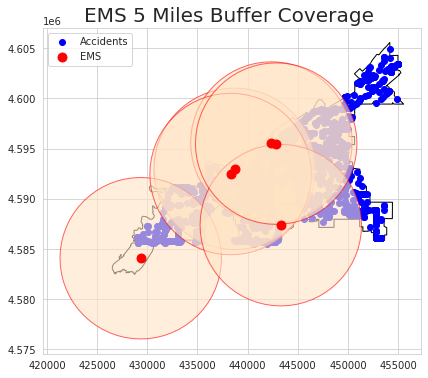

In [95]:
# The projected coordinate system map unit is meter. 5 miles = 8046.72 meters
ems_5m_coverage = gpd.GeoDataFrame(geometry=gdf_ems_cleveland.geometry).buffer(8046.72)

# Plot
ax = gdf_cleveland.plot(figsize=(20,6), color='none',edgecolor='black')
gdf_accidents_cleveland_spatial.plot(color='blue',label='Accidents',ax=ax)
ems_5m_coverage.plot(color='bisque',edgecolor='red',markersize=80,alpha=0.6,ax=ax,)
gdf_ems_cleveland.plot(color='red',markersize=80,label='EMS',ax=ax)
ax.set_title('EMS 5 Miles Buffer Coverage ',size=20)
ax.legend()


In [97]:

ems_5m_coverage_union = ems_5m_coverage.geometry.unary_union
range_5m_ems = gdf_accidents_cleveland_spatial[gdf_accidents_cleveland_spatial['geometry'].apply(lambda x: ems_5m_coverage_union.contains(x))]
print('Comment: Accidents located in North-East and South-East areas of Cleveland are out of the range.\
That is {:.2%} of accidents'.format(1-(len(range_5m_ems)/len(gdf_accidents_cleveland_spatial))))

Comment: Accidents located in North-East and South-East areas of Cleveland are out of the range.That is 9.78% of accidents


#### Hospitals Coverage within 5 Miles Radius

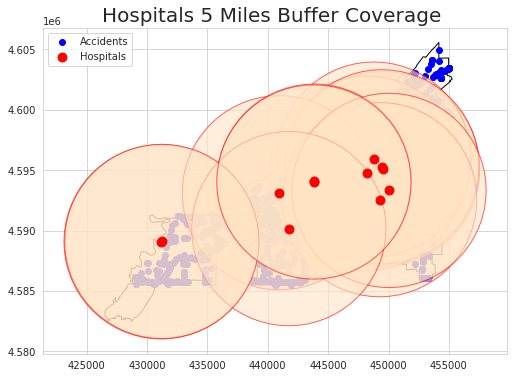

In [98]:
hospitals_5m_coverage = gpd.GeoDataFrame(geometry=gdf_hospitals_cleveland.geometry).buffer(8046.72)

# Plot 
ax = gdf_cleveland.plot(figsize=(20,6), color='none',edgecolor='black')
gdf_accidents_cleveland_spatial.plot(color='blue',label='Accidents',ax=ax)
hospitals_5m_coverage.plot(color='bisque',edgecolor='red',markersize=80,alpha=0.6,ax=ax,)
gdf_hospitals_cleveland.plot(color='red',markersize=80,label='Hospitals',ax=ax)
ax.set_title('Hospitals 5 Miles Buffer Coverage ',size=20)
ax.legend()

In [99]:
hospitals_5m_coverage_union = hospitals_5m_coverage.geometry.unary_union
range_5m_hospitals = gdf_accidents_cleveland_spatial[gdf_accidents_cleveland_spatial['geometry'].apply(lambda x: hospitals_5m_coverage_union.contains(x))]
print('Comment: Accidents located in North-East area of Cleveland are out of the range.\
That is {:.2%} of accidents'.format(1-(len(range_5m_hospitals)/len(gdf_accidents_cleveland_spatial))))

Comment: Accidents located in North-East area of Cleveland are out of the range.That is 2.15% of accidents
